In [ ]:
#'''Karolina Mięsowicz & Karolina Milewska'''

#1
#histogram -> bierzemy pod uwagę jedno słowo dla każdej osoby - porównanie - dana godzina dwie osoby
#najczęściej występująca częstotliwość (barwa głosu)


In [8]:
import wave
from pydub import AudioSegment as auds
import pandas as pd
import numpy as np
import os, fnmatch
from matplotlib import pyplot as plt
import scipy.io.wavfile as wf
from scipy.integrate import simps
import glob

In [54]:
# Sciezka
path = 'C:/Users/milka/Documents/Eksploracja/Eksploracja-danych-glosowych-main/Eksploracja-danych-glosowych-main/Nagrania'

# Wyciaganie nazw plikow ze sciezki - foldery danego słowa
list_of_files = [x[0] for x in os.walk(path)]
#pattern = "*.txt"
#list_of_names = []
#for entry in list_of_files:
#   if fnmatch.fnmatch(entry, pattern):
#            list_of_names.append(entry[:-4])        
for dir in range(len(list_of_files)):
    #print(len(list_of_files))
    list_of_files[dir] = list_of_files[dir].replace("C:/Users/milka/Documents/Eksploracja/Eksploracja-danych-glosowych-main/Eksploracja-danych-glosowych-main/Nagrania" , '')
    
    
del list_of_files[0:2]

print(list_of_files)

['\\ALARM', '\\BRAME', '\\BUDZIK', '\\CISZEJ', '\\CZAJNIK', '\\CZTERY', '\\DO', '\\DOMU', '\\DRZWI', '\\DWA', '\\EKSPRES', '\\GABINECIE', '\\GARAZ', '\\GARAZU', '\\GARDEROBIE', '\\GLOSNIEJ', '\\HERBATE', '\\JEDEN', '\\KANAL', '\\KAWE', '\\KLIMATYZACJE', '\\KOMPUTER', '\\KORYTARZU', '\\KUCHNI', '\\KWIATKI', '\\LAMPKE', '\\LAZIENCE', '\\LAZIENKI', '\\LODOWKE', '\\LOZKO', '\\MUZYKE', '\\NA', '\\O', '\\ODBLOKUJ', '\\ODSLON', '\\OGRZEWANIE', '\\OKAP', '\\OKNA', '\\OKNO', '\\OPUSC', '\\OSWIETLENIE', '\\OTWORZ', '\\PALNIK', '\\PIEKARNIK', '\\PIWNICY', '\\PODAJ', '\\PODGLOSNIJ', '\\PODLEJ', '\\PODNIES', '\\POKOJU', '\\PRALKE', '\\PROGRAM', '\\PRZEDPOKOJU', '\\PRZYCIEMNIJ', '\\PRZYCISZ', '\\PRZYGOTUJ', '\\RADIO', '\\ROLETY', '\\ROZJASNIJ', '\\SALONIE', '\\SCHODACH', '\\SCISZ', '\\SPRAWDZ', '\\SPUSC', '\\STACJE', '\\STOPIEN', '\\STOPNI', '\\STRYCHU', '\\SUSZARKE', '\\SWIATLO', '\\SYPIALNI', '\\TARASIE', '\\TELEWIZOR', '\\TEMPERATURE', '\\TRZY', '\\UCHYL', '\\USTAW', '\\W', '\\WEJSCIOWE', '\\WLAC

In [56]:
#NA RAZIE NIEPOTRZEBNE
nr_slowa = 6 #tu nr słowa
sciezka_do_slowa = path + list_of_files[nr_slowa]
print(sciezka_do_slowa)
lista_nr_indeksow = ['297761','289516','289540','289550','289556','404907']


C:/Users/milka/Documents/Eksploracja/Eksploracja-danych-glosowych-main/Eksploracja-danych-glosowych-main/Nagrania\DO


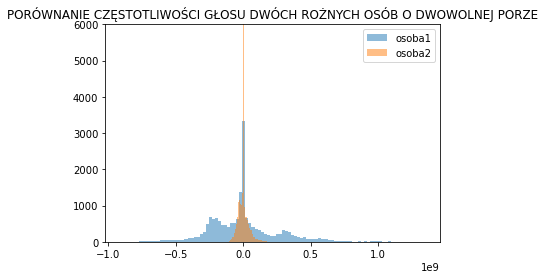

Dominująca częstotliwość osoby pierwszej: 1345342729.0
Dominująca częstotliwość osoby drugiej: 177867418.0


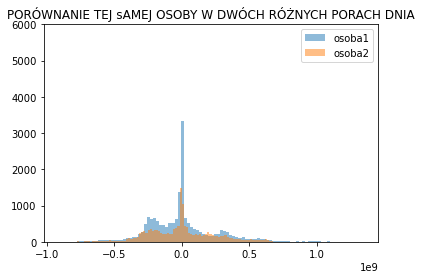

In [87]:
#porównanie dwóch osób o dowolnej godzinie

osoba1 = 'C:/Users/milka/Documents/Eksploracja/Eksploracja-danych-glosowych-main/Eksploracja-danych-glosowych-main/Nagrania/BRAME/289550_23_K_9_1_BRAME.wav'
osoba2 = 'C:/Users/milka/Documents/Eksploracja/Eksploracja-danych-glosowych-main/Eksploracja-danych-glosowych-main/Nagrania/BRAME/289540_23_K_9_1_BRAME.wav'
osoba_03 = []
word1 = wave.open(osoba1, 'rb')
        # Jeśli ilość ramek nieparzysta, to nie zadziała, więc wtedy wczytujemy wszystkie ramki oprócz ostatniej
if word1.getnframes() % 2 != 0:
    word1_frames = word1.readframes(word1.getnframes()-1)
else:
    word1_frames = word1.readframes(word1.getnframes())
word1_frames = np.frombuffer(word1_frames, dtype=int) #amplitudy
osoba_03.append(word1_frames)
# plt.figure()
# plt.plot(word1_frames)
# plt.title('osoba1')
# plt.show()

#print(len(word1_frames))

word2 = wave.open(osoba2, 'rb')
        # Jeśli ilość ramek nieparzysta, to nie zadziała, więc wtedy wczytujemy wszystkie ramki oprócz ostatniej
if word2.getnframes() % 2 != 0:
    word2_frames = word2.readframes(word2.getnframes()-1)
else:
    word2_frames = word2.readframes(word2.getnframes())
word2_frames = np.frombuffer(word2_frames, dtype=int) #amplitudy
osoba_03.append(word2_frames)
# plt.figure()
# plt.plot(word2_frames)
# plt.title('osoba2')
# plt.show()

#print(len(word2_frames))

word1_frame = np.array(word1_frames)
word2_frame = np.array(word2_frames)

word1_frame = word1_frame[0:19000]
word2_frame = word2_frame[0:19000]

#bins = np.linspace(1,20000,len(word1_frame))

plt.figure()
plt.title('PORÓWNANIE CZĘSTOTLIWOŚCI GŁOSU DWÓCH ROŻNYCH OSÓB O DWOWOLNEJ PORZE')
y1,x1,_ = plt.hist(word1_frames,bins=100,alpha=0.5,label='osoba1')
y2,x2,_ = plt.hist(word2_frames,bins=100,alpha=0.5,label='osoba2')
plt.ylim([0,6000])
plt.legend()
plt.show()

#częstotliwości dominujące głosu

#różne osoby:
print('Dominująca częstotliwość osoby pierwszej:', x1.max())
print('Dominująca częstotliwość osoby drugiej:', x2.max())


#porownanie tego samego słowa o innej godzinie dla tej samej osoby

osoba1 = 'C:/Users/milka/Documents/Eksploracja/Eksploracja-danych-glosowych-main/Eksploracja-danych-glosowych-main/Nagrania/BRAME/289550_23_K_9_1_BRAME.wav'
osoba2 = 'C:/Users/milka/Documents/Eksploracja/Eksploracja-danych-glosowych-main/Eksploracja-danych-glosowych-main/Nagrania/BRAME/289550_23_K_18_2_BRAME.wav'
osoba_03 = []
word1 = wave.open(osoba1, 'rb')
        # Jeśli ilość ramek nieparzysta, to nie zadziała, więc wtedy wczytujemy wszystkie ramki oprócz ostatniej
if word1.getnframes() % 2 != 0:
    word1_frames = word1.readframes(word1.getnframes()-1)
else:
    word1_frames = word1.readframes(word1.getnframes())
word1_frames = np.frombuffer(word1_frames, dtype=int) #amplitudy
osoba_03.append(word1_frames)
#plt.figure()
#plt.plot(word1_frames)
#plt.title('osoba1')
#plt.show()

#print(len(word1_frames))

word2 = wave.open(osoba2, 'rb')
        # Jeśli ilość ramek nieparzysta, to nie zadziała, więc wtedy wczytujemy wszystkie ramki oprócz ostatniej
if word2.getnframes() % 2 != 0:
    word2_frames = word2.readframes(word2.getnframes()-1)
else:
    word2_frames = word2.readframes(word2.getnframes())
word2_frames = np.frombuffer(word2_frames, dtype=int) #amplitudy
osoba_03.append(word2_frames)
#plt.figure()
#plt.plot(word2_frames)
#plt.title('osoba2')
#plt.show()

#print(len(word2_frames))

word1_frame = np.array(word1_frames)
word2_frame = np.array(word2_frames)

word1_frame = word1_frame[0:19000]
word2_frame = word2_frame[0:19000]

#bins = np.linspace(1,20000,len(word1_frame))

plt.figure()
plt.title("PORÓWNANIE TEJ sAMEJ OSOBY W DWÓCH RÓŻNYCH PORACH DNIA")
plt.hist(word1_frames,bins=100,alpha=0.5,label='osoba1')
plt.hist(word2_frames,bins=100,alpha=0.5,label='osoba2')
plt.ylim([0,6000])
plt.legend()
plt.show()
